# Chapter 29: Spanners 1 (Slurs)

 a **“Spanner”** is a Music21Object that denotes a relationship among other elements.
 
 Music would be dull if we could not **cross the barline**, and Spanners are the key to doing so successfully

In [1]:
from music21 import *

## Slurs

We will use *TinyNotation* to quickly get a short part

In [2]:
p = converter.parse("tinynotation: 4/4 c4 d e f g a b c' b a g2")
p.show('xml')

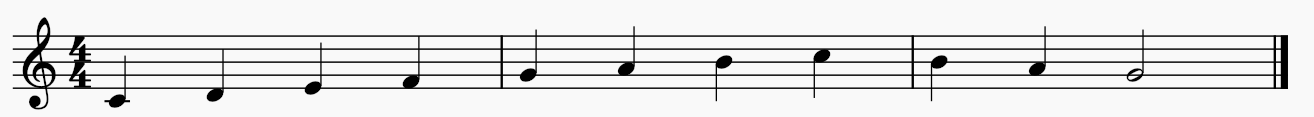

Let’s put a slur over the first two notes

In [3]:
c = p.recurse().notes[0]
d = p.recurse().notes[1]
sl1 = spanner.Slur([c, d])
sl1

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>

Note: a couple of things: the **notes of the spanner** should be enclosed in a grouping container such as a list or tuple and then passed into the Slur.

But If we look at the part, nothing has changed

In [4]:
p.show('xml')

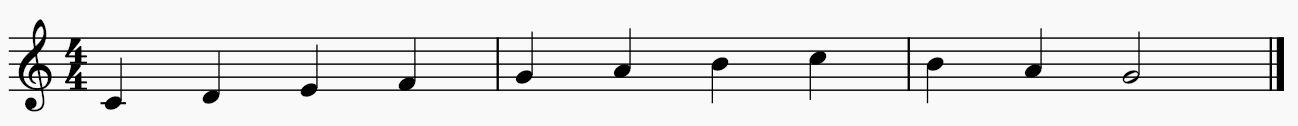

Why not? Well, we have a slur, but it’s not part of the part yet. 

In [5]:
#  By convention we put spanners at the beginning of a Stream, at offset 0.0
m1 = p.getElementsByClass('Measure')[0]
m1.insert(0.0, sl1)
p.show('xml')

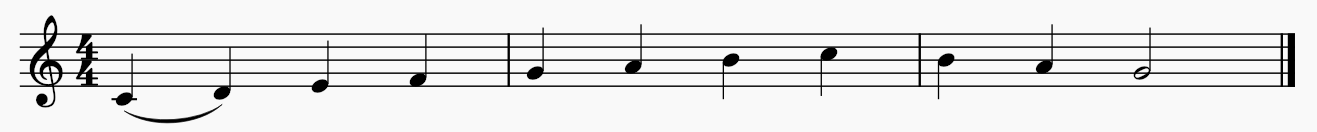

But the power of the slur is that it can cross barlines

In [6]:
# let’s create another one from the F to the A.
m2 = p.getElementsByClass('Measure')[1]
f = m1.notes[-1]
g = m2.notes[0]
a = m2.notes[1]
sl2 = spanner.Slur([f, g, a])

In [7]:
p.insert(0.0, sl2)
p.show('xml')

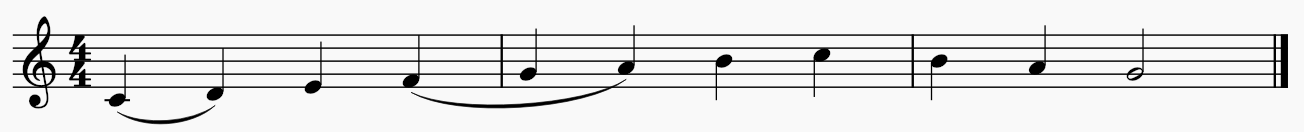

Depending on what you want to use the spanner for, you might not need to include all the **intermediary notes** in a spanner

In [8]:
m3 = p.getElementsByClass('Measure')[2]
c2 = m2.notes[-1]
g2 = m3.notes[-1]
sl3 = spanner.Slur([c2, g2])
m2.insert(0, sl3)
p.show('xml')

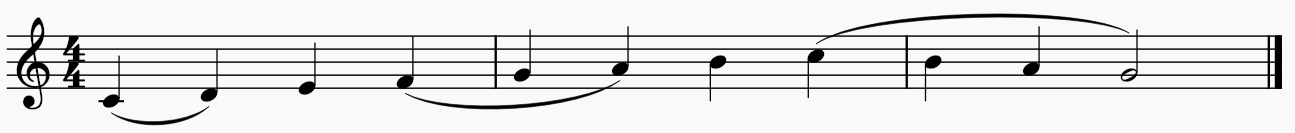

 see which elements are contained in it with ***.getSpannedElements***

In [9]:
sl1.getSpannedElements()

[<music21.note.Note C>, <music21.note.Note D>]

In [10]:
sl2.getSpannedElements()

[<music21.note.Note F>, <music21.note.Note G>, <music21.note.Note A>]

## Spanners in Streams

As far as a Stream is concerned, a spanner is just another element.

In [11]:
for el in m1:
    print(el)

<music21.clef.TrebleClef>
<music21.meter.TimeSignature 4/4>
<music21.note.Note C>
<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note F>


Remember that we chose to put the second slur(sl2) in the part, so only the first slur appeared.

There’s also a shortcut for getting all the spanners in a stream, the ***.spanners*** property

In [13]:
list(m1.spanners)

[<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>]

In [14]:
for sp in p.recurse().spanners:
    print(sp)

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>
<music21.spanner.Slur <music21.note.Note F><music21.note.Note G><music21.note.Note A>>
<music21.spanner.Slur <music21.note.Note C><music21.note.Note G>>


## Querying spanners

Spanners can tell us a lot of information about their contents.

In [15]:
# the number of elements spanned
len(sl2)

3

They can find the first and last element:

In [16]:
sl2.getFirst()

<music21.note.Note F>

In [17]:
sl2.getLast()

<music21.note.Note A>

And they can tell if something *.isFirst()* or *.isLast()*

In [18]:
for el in p.recurse():
    for sp in [sl1, sl2, sl3]:
        if sp.isFirst(el):
            el.lyric = 'First!'
        elif sp.isLast(el):
            el.lyric = 'Last!'
p.show('xml')

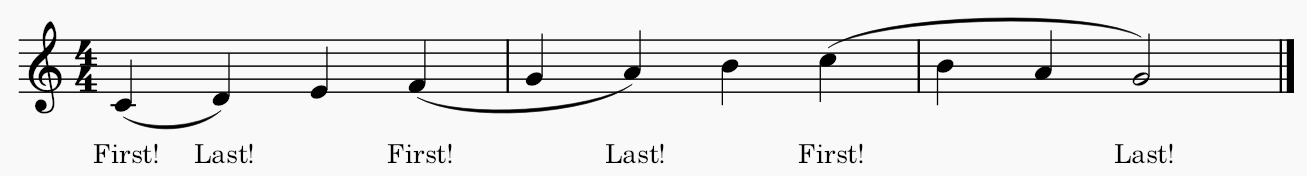

In [19]:
# We can also tell if any element is in a particular spanner
f in sl2

True

## Getting spanners from Music21Objects

Each element in a stream can also report what spanners are attached to it:

In [20]:
c.getSpannerSites()

[<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>]

it is possible for an object to be a part of **more than one spanner**

In [21]:
gliss = spanner.Glissando([f, g])
p.insert(0, gliss)
p.show('xml')

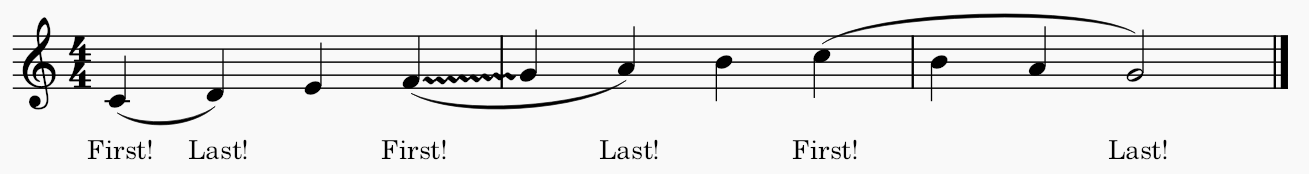

In [22]:
g.getSpannerSites()

[<music21.spanner.Slur <music21.note.Note F><music21.note.Note G><music21.note.Note A>>,
 <music21.spanner.Glissando <music21.note.Note F><music21.note.Note G>>]

## Manipulating spanners

Spanners can add elements such as notes to them

In [36]:
# put the e into the first slur
sl1.addSpannedElements(m1.notes[2])
sl1

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D><music21.note.Note E>>

## Changing the look of spanners

Slurs can be placed above or below

In [49]:
sl1.placement = 'above'
p.show('xml')

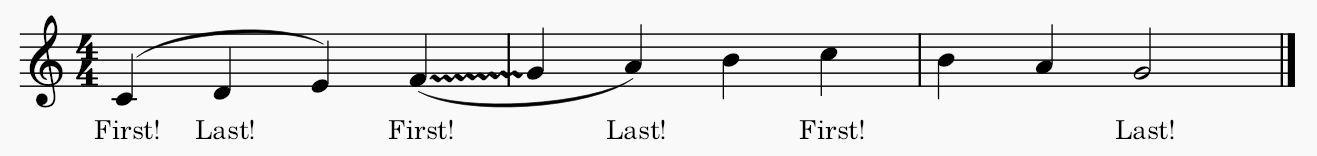

Slurs also can configure whether they are solid or dashed

In [50]:
gliss.label = 'gliss.'
p.show('xml')

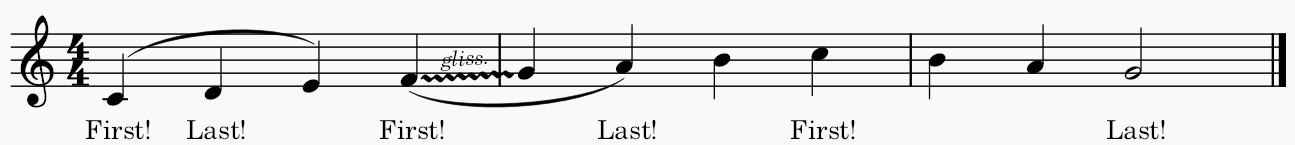

**Crescendo and Diminuendo wedges**(渐强和渐弱符号) are also spanners, though they live in the *music21.dynamics* module

In [ ]:
#cresc = dynamics.Crescendo([a, b, c2])
#cresc.spread = 20

#dim = dynamics.Diminuendo([b2, a2, aflat])
#dim.spread = 10

#p.insert(0.0, cresc)
#p.insert(0.0, dim)